In [5]:
import requests
import json
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from IPython.display import JSON
import ast
import scipy.stats as stats
import source.util as util

from scipy.ndimage.interpolation import shift


In [2]:
# From SKEW
def fill_empty_dates (df):
    dates = pd.date_range(df.index.min(), df.index.max())
    return df.reindex(dates)
def clamp_dates (df, start='2017-01-01', end='2020-12-05'):
    dates = pd.date_range(start, end)
    return df.reindex(dates)
def dual_rolling_smooth ( data, d = 5 ):
    return scale ( 
        pd.Series(data)
            .rolling(d).mean()[::-1]
            .rolling(d).mean()[::-1]
            .rolling(d*2).mean()[::-1]
            .rolling(d*2).mean()[::-1]
    )
# Scale all the data so it is between 0 and 1
def scale ( data ):
    return (data - data.min()) / ( data.max() - data.min() )

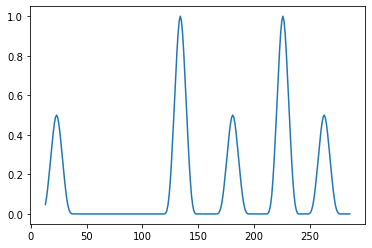

In [15]:
data = dual_rolling_smooth( np.random.choice(3, 300, p=[0.95, 0.025, 0.025]) )
plt.plot( data )

In [22]:
data

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
295   NaN
296   NaN
297   NaN
298   NaN
299   NaN
Length: 300, dtype: float64

In [36]:
def shift(xs, n):
    e = np.empty_like(xs)
    if n >= 0:
        e[:n] = 0
        e[n:] = xs[:-n]
    else:
        e[n:] = 0
        e[:n] = xs[-n:]
    return e

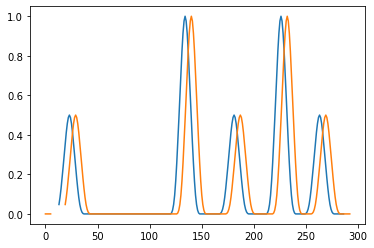

In [37]:
data_2 = shift(data, 6)
plt.plot(data)
plt.plot(data_2)

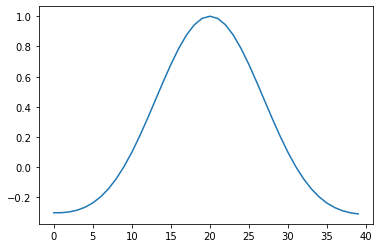

In [42]:
# Try it out
def run_shift_similarity( data, n ):
    if n == 0:
        return 1
    else:
        a = data.fillna(0)
        b = shift(a, n)
        return stats.pearsonr(a,b)[0]

sims = []
for i in range(-20,20):
    _ = run_shift_similarity(data, i)
    sims.append( _  )
    
plt.plot(sims)

Using this measure we can see when relations are shifted and in what way. We can ultimantly create a script to compair stocks to news, find coorilations, and then indicate how these coorilations are shifted over time